In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset  =  pd.read_csv('creditcard.csv')

In [3]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
import seaborn as sns

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


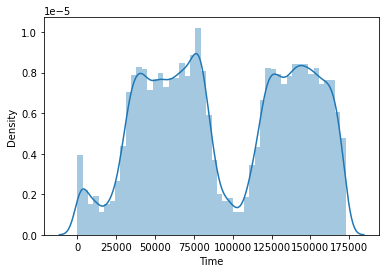

In [5]:
sns.distplot(a=dataset['Time'],label=dataset['Class'])

0    284315
1       492
Name: Class, dtype: int64


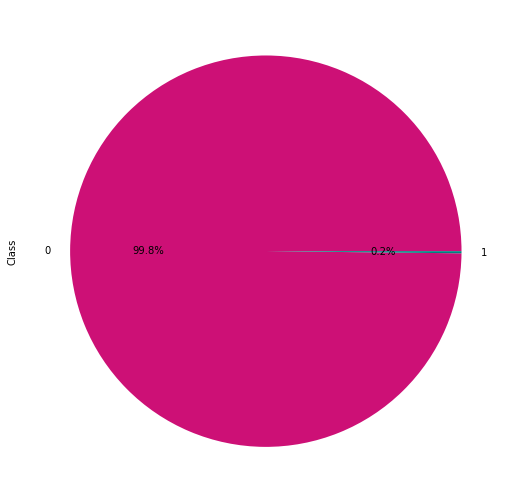

In [6]:


dataset['Class'].value_counts().plot(kind='pie',colors=['#cd1076', '#008080'],autopct='%1.1f%%',figsize=(9,9))
plt.show
varValue = dataset.Class.value_counts()
print(varValue)

In [7]:
from sklearn.utils import resample
df_majority = dataset.loc[dataset.Class == 0].copy()
df_minority = dataset.loc[dataset.Class == 1].copy()
df_minority_upsampled = resample(df_minority,
                             replace=True,  # sample with replacement
                             n_samples=284315,  # to match majority class
                             random_state=123) 
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

1    284315
0    284315
Name: Class, dtype: int64


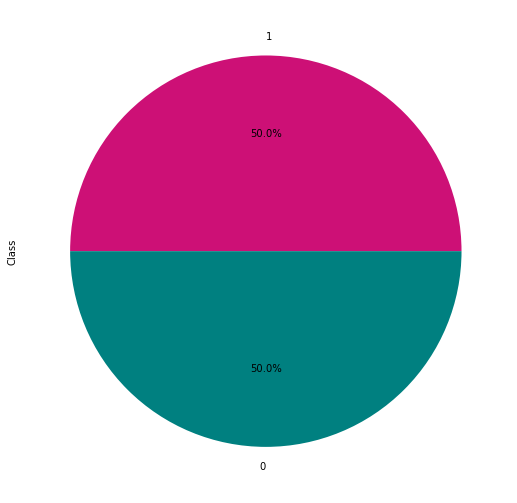

In [8]:

df_upsampled['Class'].value_counts().plot(kind='pie',colors=['#cd1076', '#008080'],autopct='%1.1f%%',figsize=(9,9))
plt.show
varValue = df_upsampled.Class.value_counts()
print(varValue)


In [9]:
df_upsampled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Counter({1: 511875, -1: 56755})


<ipython-input-10-40ebb1d1ea28>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if_anomalies=df_upsampled[if_anomalies==1];


(array([  2315.,   3405.,   6410.,  28009.,  23511.,  17500.,  56227.,
        101266., 190563., 139424.]),
 array([-0.1667156 , -0.13015381, -0.09359203, -0.05703024, -0.02046845,
         0.01609333,  0.05265512,  0.08921691,  0.12577869,  0.16234048,
         0.19890227]),
 <a list of 10 Patch objects>)

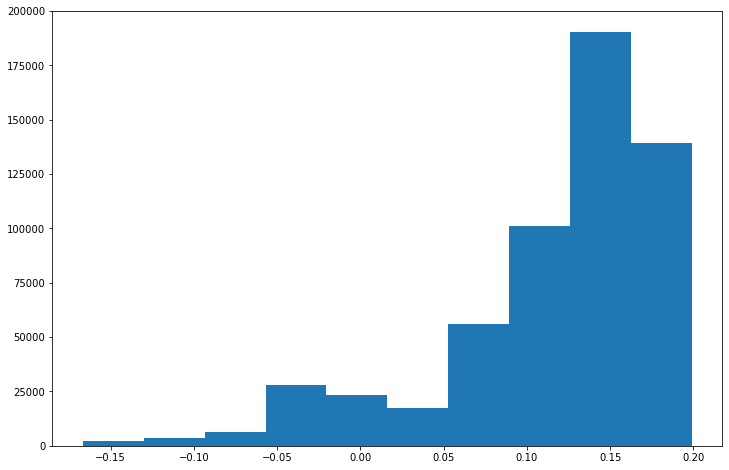

In [10]:

from sklearn.ensemble import IsolationForest
from collections import Counter
rs=np.random.RandomState(0)
clf = IsolationForest(max_samples=100,random_state=rs, contamination=.1) 
clf.fit(df_upsampled)
y_pred_train = clf.predict(df_upsampled)
sayı = Counter(y_pred_train)
print(sayı)

if_scores = clf.decision_function(df_upsampled)
if_anomalies=clf.predict(df_upsampled)
if_anomalies=pd.Series(if_anomalies).replace([-1,1],[1,0])
if_anomalies=df_upsampled[if_anomalies==1];
plt.figure(figsize=(12,8))
plt.hist(if_scores)


In [11]:
Q1 = df_upsampled.quantile(0.25)
Q3 = df_upsampled.quantile(0.75)
IQR = Q3 - Q1

In [12]:
data = df_upsampled[~((df_upsampled < (Q1 - 1.5 * IQR)) |(df_upsampled > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(308157, 31)


In [13]:
X = data.iloc[:, 0:30]
Y = data.iloc[:, 30]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 100)

In [17]:
from xgboost import XGBClassifier
xgb =XGBClassifier(n_estimators=200, learning_rate=0.08, max_depth=6)
xgb.fit(X_train,y_train)
prediction = xgb.predict(X_test)
from sklearn.metrics import accuracy_score,f1_score
acc = accuracy_score(y_test, prediction)*100
print("Xgboost Classifier accuracy:",acc)

f1=f1_score(y_test,prediction)*100
print("F1 Score: ",f1)

C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:28:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Xgboost Classifier accuracy: 99.9983774662513
F1 Score:  99.99735778265119


In [20]:
import pickle as pkl
pkl.dump(xgb,open("model.pkl","wb"))

In [21]:
fraud = dataset[dataset['Class'] == 1]
non_fraud = dataset[dataset['Class'] == 0]

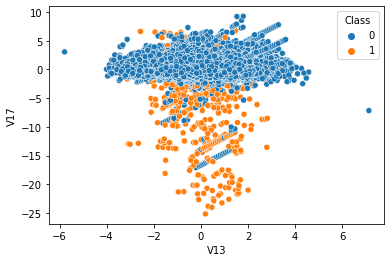

In [22]:
sns.scatterplot(x=dataset['V13'], y=dataset['V17'], hue=dataset['Class'])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


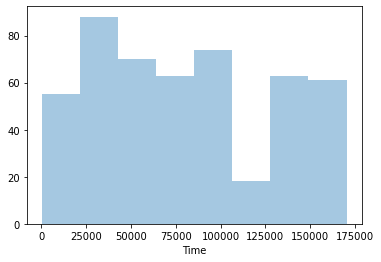

In [23]:
sns.distplot(a=fraud['Time'],kde=0)

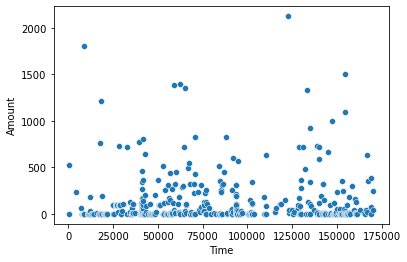

In [36]:
sns.scatterplot(x=fraud ['Time'],y=fraud ['Amount'], )

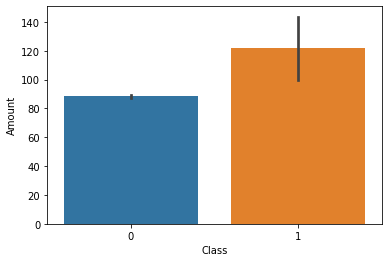

In [39]:
sns.barplot(x=dataset['Class'],y=dataset['Amount'])

ModuleNotFoundError: No module named 'ploty'